# Spaceship Titanic

This notebook looks into various Python based Machine learning and data science libraries to build a machine learning model capabel of predicting which passengers are transported to an alternate dimension.

We're going to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Modelling
5. Experimentation

## 1. Problem Definition:

In a statement,
    In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly.

## 2. Data:
The data was based on cosmic mystery which was created by Addison Howard, Ashley Chow, Ryan Holbrook. (2022). Spaceship Titanic. Kaggle.
click here:https://kaggle.com/competitions/spaceship-titanic

## 3. Evaluation:
Submissions are evaluated based on their classification accuracy, the percentage of predicted labels that are correct.

## 4. Features:
* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


    

In [ ]:
# Import basic requirements
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

In [ ]:
# import the data
df = pd.read_csv("train.csv")

In [ ]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
df.shape

(8693, 14)

In [ ]:
# Check the dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
# check for nan values
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
# only the columns of cryosleep nan values
df[df.CryoSleep.isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
92,0099_02,Earth,NaN,G/12/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Thewis Connelson,True
98,0105_01,Earth,NaN,F/21/P,TRAPPIST-1e,27.0,False,0.0,0.0,570.0,2.0,131.0,Carry Cleachrand,False
104,0110_02,Europa,NaN,B/5/P,TRAPPIST-1e,40.0,False,0.0,331.0,0.0,0.0,1687.0,Aldeba Bootious,False
111,0115_01,Mars,NaN,F/24/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,NaN,Rohs Pead,True
152,0173_01,Earth,NaN,E/11/S,TRAPPIST-1e,58.0,False,0.0,985.0,0.0,5.0,0.0,Hilip Grifford,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8620,9197_01,Europa,NaN,C/308/P,55 Cancri e,44.0,False,0.0,0.0,0.0,0.0,0.0,Bellus Platch,True
8651,9227_05,Earth,NaN,G/1498/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,Hard Hinglendez,False
8664,9246_01,Earth,NaN,G/1490/S,TRAPPIST-1e,32.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True


In [ ]:
df.CryoSleep

0       False
1       False
2       False
3       False
4       False
        ...  
8688    False
8689     True
8690    False
8691    False
8692    False
Name: CryoSleep, Length: 8693, dtype: object

In [ ]:
df.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [ ]:
df.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [ ]:
np.nanmedian(df.RoomService)

0.0

<Axes: xlabel='HomePlanet'>

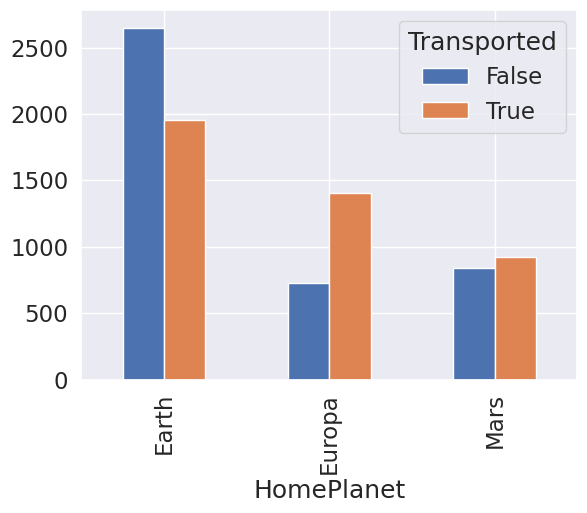

In [ ]:
pd.crosstab(df.HomePlanet, df.Transported).plot(kind="bar")

In [ ]:
df.VIP.value_counts()

False    8291
True      199
Name: VIP, dtype: int64

<Axes: xlabel='VIP'>

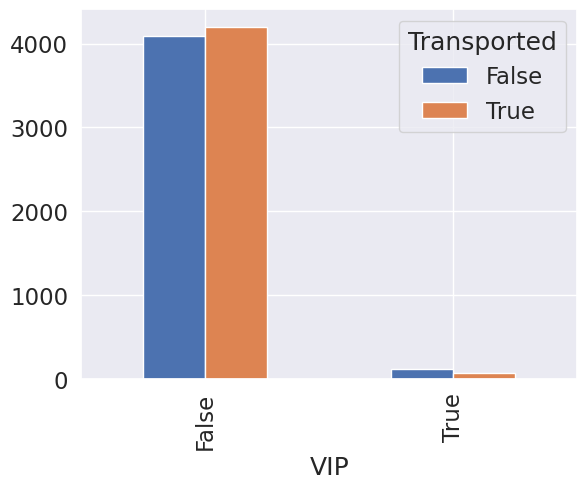

In [ ]:
pd.crosstab(df.VIP, df.Transported).plot(kind="bar")

In [ ]:
df.corr()

<ipython-input-289-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


## Cryosleep prediction

In [ ]:
cryo_df = df.drop("Transported", axis=1)

In [ ]:
# converts all the strings to Categorical
def convert_to_categorical(df_temp):
  for column, values in df_temp.items():
     if pd.api.types.is_string_dtype(values):
      df_temp[column] = values.astype("category").cat.as_ordered()

  return df_temp

# Handles all the missing
def handles_missing_values(df_temp):
  for column, values in df_temp.items():
    if pd.api.types.is_numeric_dtype(values):
      if pd.isnull(values).any():
        # if not column == "Age":
        df_temp[column+ "_is_missing"] = pd.isnull(values)
        df_temp[column].fillna(np.nanmedian(values), inplace=True)
        # else:
        #   df_temp[column+"_is_missing"] = pd.isnull(values)
        #   df_temp[column].fillna(values.mode()[0], inplace=True)

  for column, values in df_temp.items():
    if pd.api.types.is_categorical_dtype(values):
        if not column == "CryoSleep":
          df_temp[column+"_is_missing"] = pd.isnull(values)
          df_temp[column] = pd.Categorical(values).codes +1
        else:
          df_temp[column] = pd.Categorical(values).codes +1

  return df_temp

In [ ]:
np.nanmedian(cryo_df.Age)

27.0

In [ ]:
cryo_df = convert_to_categorical(cryo_df)
print(cryo_df.isna().sum())
cryo_df


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre


In [ ]:
cryo_test = cryo_df[cryo_df.CryoSleep.isna()]
cryo_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
92,0099_02,Earth,NaN,G/12/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Thewis Connelson
98,0105_01,Earth,NaN,F/21/P,TRAPPIST-1e,27.0,False,0.0,0.0,570.0,2.0,131.0,Carry Cleachrand
104,0110_02,Europa,NaN,B/5/P,TRAPPIST-1e,40.0,False,0.0,331.0,0.0,0.0,1687.0,Aldeba Bootious
111,0115_01,Mars,NaN,F/24/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,NaN,Rohs Pead
152,0173_01,Earth,NaN,E/11/S,TRAPPIST-1e,58.0,False,0.0,985.0,0.0,5.0,0.0,Hilip Grifford
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8620,9197_01,Europa,NaN,C/308/P,55 Cancri e,44.0,False,0.0,0.0,0.0,0.0,0.0,Bellus Platch
8651,9227_05,Earth,NaN,G/1498/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,Hard Hinglendez
8664,9246_01,Earth,NaN,G/1490/S,TRAPPIST-1e,32.0,False,0.0,0.0,0.0,0.0,0.0,NaN
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons


In [ ]:
cryo_train = cryo_df.dropna(subset=["CryoSleep"])

In [ ]:
cryo_df.shape, cryo_train.shape,cryo_test.shape, 8476 +217

((8693, 13), (8476, 13), (217, 13), 8693)

In [ ]:
mmm_dict={}
for column, value in cryo_train.items():
  if pd.api.types.is_numeric_dtype(value):
    mmm_dict[column] = {"Mean":np.mean(value),
                        "Median": np.nanmedian(value),
                        "Mode": cryo_train[column].mode(),
                        "TotalNAN": value.isna().sum(),}

mmm_dict

{'Age': {'Mean': 28.851530489274523,
  'Median': 27.0,
  'Mode': 0    24.0
  Name: Age, dtype: float64,
  'TotalNAN': 178},
 'RoomService': {'Mean': 224.85018681451126,
  'Median': 0.0,
  'Mode': 0    0.0
  Name: RoomService, dtype: float64,
  'TotalNAN': 179},
 'FoodCourt': {'Mean': 458.0038572806172,
  'Median': 0.0,
  'Mode': 0    0.0
  Name: FoodCourt, dtype: float64,
  'TotalNAN': 180},
 'ShoppingMall': {'Mean': 174.42955534074432,
  'Median': 0.0,
  'Mode': 0    0.0
  Name: ShoppingMall, dtype: float64,
  'TotalNAN': 200},
 'Spa': {'Mean': 311.9945770065076,
  'Median': 0.0,
  'Mode': 0    0.0
  Name: Spa, dtype: float64,
  'TotalNAN': 178},
 'VRDeck': {'Mean': 305.10066305003016,
  'Median': 0.0,
  'Mode': 0    0.0
  Name: VRDeck, dtype: float64,
  'TotalNAN': 181}}

In [ ]:
cryo_train.shape

(8476, 13)

In [ ]:
# def handle_missing(df):
#   for column, values in df.items():
#     if not pd.api.types.is_numeric_dtype(values):
#       if column != "CryoSleep":
#         df[column] = values.astype("category").cat.as_ordered()
#       else:
#         df[column].astype(bool)

#   for column, value in df.items():
#     if column != "Age":
#       if pd.api.types.is_numeric_dtype(values):
#         df[column].fillna(np.nanmedian(values), inplace= True)
#     else:
#       df[column].fillna(values.mode()[0], inplace=True)

#   for column, value in df.items():
#       if pd.api.types.is_categorical_dtype(values):
#         # if column != "CryoSleep":
#         df[column]= pd.Categorical(values).codes + 1
#   return df

# # define a fucntion that handles with misiing values
# def handle_missing_values(df_temp):
#   for column, values in df_temp.items():
#     if pd.api.types.is_string_dtype(values):
#       df_temp[column] = values.astype("category").cat.as_ordered()
#     if pd.api.types.is_numeric_dtype(values):
#       if pd.isnull(values).any():
#         if not column == "Age":
#           df_temp[column+ "_is_missing"] = pd.isnull(values)
#           df_temp[column].fillna(np.nanmedian(values), inplace=True)
#         else:
#           df_temp[column+"_is_missing"] = pd.isnull(values)
#           df_temp[column].fillna(values.mode()[0], inplace=True)

#   for column, values in df_temp.items():
#       if pd.api.types.is_categorical_dtype(values):
#         if not column == "CryoSleep":
#           df_temp[column+"_is_missing"] = pd.isnull(values)
#           df_temp[column] = pd.Categorical(values).codes +1
#         else:
#           df_temp[column] = pd.Categorical(values).codes +1

#   return df_temp

In [ ]:
clean_cryo_df = handles_missing_values(cryo_train)

<ipython-input-291-22af8e3f03bd>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[column+ "_is_missing"] = pd.isnull(values)
<ipython-input-291-22af8e3f03bd>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[column].fillna(np.nanmedian(values), inplace=True)
<ipython-input-291-22af8e3f03bd>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [ ]:
clean_cryo_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,FoodCourt_is_missing,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing,PassengerId_is_missing,HomePlanet_is_missing,Cabin_is_missing,Destination_is_missing,VIP_is_missing,Name_is_missing
0,1,2,1,150,3,39.0,1,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,2185,3,24.0,1,109.0,9.0,25.0,...,False,False,False,False,False,False,False,False,False,False
2,3,2,1,2,3,58.0,2,43.0,3576.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,4,2,1,2,3,33.0,1,0.0,1283.0,371.0,...,False,False,False,False,False,False,False,False,False,False
4,5,1,1,2187,3,16.0,1,303.0,70.0,151.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,8689,2,1,147,1,41.0,2,0.0,6819.0,0.0,...,False,False,False,False,False,False,False,False,False,False
8689,8690,1,2,5281,2,18.0,1,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
8690,8691,1,1,5286,3,26.0,1,0.0,0.0,1872.0,...,False,False,False,False,False,False,False,False,False,False
8691,8692,2,1,2132,1,32.0,1,0.0,1049.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
clean_cryo_df.isna().sum()

PassengerId                0
HomePlanet                 0
CryoSleep                  0
Cabin                      0
Destination                0
Age                        0
VIP                        0
RoomService                0
FoodCourt                  0
ShoppingMall               0
Spa                        0
VRDeck                     0
Name                       0
Age_is_missing             0
RoomService_is_missing     0
FoodCourt_is_missing       0
ShoppingMall_is_missing    0
Spa_is_missing             0
VRDeck_is_missing          0
PassengerId_is_missing     0
HomePlanet_is_missing      0
Cabin_is_missing           0
Destination_is_missing     0
VIP_is_missing             0
Name_is_missing            0
dtype: int64

In [ ]:

# split the data into cx and cy
cx = clean_cryo_df.drop("CryoSleep",axis = 1)
cy = clean_cryo_df.CryoSleep
cx.shape, cy.shape

((8476, 24), (8476,))

In [ ]:
# set the random.seed()
np.random.seed(42)
# split the data into training and test sets
from sklearn.model_selection import train_test_split

cx_train, cx_test, cy_train, cy_test = train_test_split(cx,cy,test_size=0.2)

In [ ]:
cy_train

4562    1
7696    1
7783    2
2790    1
4303    1
       ..
5875    1
5315    2
5519    1
882     1
7459    2
Name: CryoSleep, Length: 6780, dtype: int8

In [ ]:
# Modelling
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

model_dict = {"RFC": RandomForestClassifier(),
               "LogisticRegression": LogisticRegression(),
               "SGD": SGDClassifier(),
               "KNN": KNeighborsClassifier(),
              "GRA":GradientBoostingClassifier()}

def model_evals(model_dict, x_train, x_test, y_train, y_test):
  model_evals = {}
  for column, clf in model_dict.items():
    clf.fit(x_train, y_train)
    model_evals[column] = clf.score(x_test,y_test)

  return model_evals



In [ ]:
model_scores = model_evals(model_dict, cx_train, cx_test, cy_train, cy_test)
model_scores

{'RFC': 0.9469339622641509,
 'LogisticRegression': 0.9492924528301887,
 'SGD': 0.7635613207547169,
 'KNN': 0.8313679245283019,
 'GRA': 0.9581367924528302}

In [ ]:
# # RandomizedSearchCV
# # import the libraries
# from sklearn.model_selection import RandomizedSearchCV
# # import the RandomizedSearchcv
# rfc_params = {"n_estimators": np.arange(0,2000,100),
#               "max_depth":np.arange(0,110,10),
#               "min_samples_split": np.arange(0,10,2),
#               "min_samples_leaf":[1,2,4],
#               "max_features":["auto","sqrt"],
#               }
# # instantiate the algorithm
# rs_rfc = RandomizedSearchCV(RandomForestClassifier(),
#                             param_distributions= rfc_params,
#                             cv=5,
#                             verbose=2,
#                             n_iter=10,
#                             random_state = 42)
# # fit the model
# rs_rfc.fit(cx_train, cy_train)

In [ ]:
# rs_rfc.best_params_


In [ ]:
# rs_rfc.score(cx_test,cy_test)

In [ ]:
cs_rfc = RandomForestClassifier(n_estimators= 1400,
                                min_samples_split=2,
                                min_samples_leaf= 4,
                                max_features= 'sqrt',
                                max_depth= 80)

In [ ]:
cs_rfc.fit(cx, cy)

RandomForestClassifier(max_depth=80, min_samples_leaf=4, n_estimators=1400)

In [ ]:
# cs_rfc.score(cx_test, cy_test)

In [ ]:
clean_cryo_test = handles_missing_values(cryo_test)
clean_cryo_test.drop("CryoSleep",axis=1, inplace=True)

<ipython-input-291-22af8e3f03bd>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[column+ "_is_missing"] = pd.isnull(values)
<ipython-input-291-22af8e3f03bd>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[column].fillna(np.nanmedian(values), inplace=True)
<ipython-input-291-22af8e3f03bd>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [ ]:
clean_cryo_test["CryoSleep"] = cs_rfc.predict(clean_cryo_test)

<ipython-input-315-8106f1efa751>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_cryo_test["CryoSleep"] = cs_rfc.predict(clean_cryo_test)


In [ ]:
clean_cryo_test.shape, cx.shape

((217, 25), (8476, 24))

In [ ]:
clean_cryo_test

,PassengerId,HomePlanet,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing,PassengerId_is_missing,HomePlanet_is_missing,Cabin_is_missing,Destination_is_missing,VIP_is_missing,Name_is_missing,CryoSleep
92,93,1,4849,3,2.0,1,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,2
98,99,1,3443,3,27.0,1,0.0,0.0,570.0,2.0,...,False,False,False,False,False,False,False,False,False,1
104,105,2,529,3,40.0,1,0.0,331.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,1
111,112,3,3485,3,26.0,1,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,False,2
152,153,1,1426,3,58.0,1,0.0,985.0,0.0,5.0,...,False,False,False,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8620,8621,2,917,1,44.0,1,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,2
8651,8652,1,5280,3,8.0,1,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,2
8664,8665,1,5270,3,32.0,1,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,2
8675,8676,1,3406,3,44.0,1,1030.0,1015.0,0.0,11.0,...,False,False,True,False,False,False,False,False,False,1


In [ ]:
def cryo_missing(cryo_data, value=False):
  cryo_data["CryoSleep"+"_is_missing"] = value

  return cryo_data

final_cryo_train = cryo_missing(clean_cryo_df, False)
final_cryo_test = cryo_missing(clean_cryo_test, True)
frames = [final_cryo_train, final_cryo_test]
final_df = pd.concat(frames)

<ipython-input-318-18c1aad4a83a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cryo_data["CryoSleep"+"_is_missing"] = value
<ipython-input-318-18c1aad4a83a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cryo_data["CryoSleep"+"_is_missing"] = value


In [ ]:
# final_df.sort_values("PassengerId", ascending=True)
final_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing,PassengerId_is_missing,HomePlanet_is_missing,Cabin_is_missing,Destination_is_missing,VIP_is_missing,Name_is_missing,CryoSleep_is_missing
0,1,2,1,150,3,39.0,1,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,2185,3,24.0,1,109.0,9.0,25.0,...,False,False,False,False,False,False,False,False,False,False
2,3,2,1,2,3,58.0,2,43.0,3576.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,4,2,1,2,3,33.0,1,0.0,1283.0,371.0,...,False,False,False,False,False,False,False,False,False,False
4,5,1,1,2187,3,16.0,1,303.0,70.0,151.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8620,8621,2,2,917,1,44.0,1,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
8651,8652,1,2,5280,3,8.0,1,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
8664,8665,1,2,5270,3,32.0,1,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,True
8675,8676,1,1,3406,3,44.0,1,1030.0,1015.0,0.0,...,False,False,True,False,False,False,False,False,False,True


In [ ]:
final_df.sort_values("PassengerId", ascending=True, inplace=True)

In [ ]:
final_df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing,PassengerId_is_missing,HomePlanet_is_missing,Cabin_is_missing,Destination_is_missing,VIP_is_missing,Name_is_missing,CryoSleep_is_missing
8688,8689,2,1,147,1,41.0,2,0.0,6819.0,0.0,...,False,False,False,False,False,False,False,False,False,False
8689,8690,1,2,5281,2,18.0,1,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
8690,8691,1,1,5286,3,26.0,1,0.0,0.0,1872.0,...,False,False,False,False,False,False,False,False,False,False
8691,8692,2,1,2132,1,32.0,1,0.0,1049.0,0.0,...,False,False,False,False,False,False,False,False,False,False
8692,8693,2,1,2132,3,44.0,1,126.0,4688.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.shape

(8693, 14)

In [ ]:
final_df.PassengerId.duplicated().sum()

0

### Handling with numerical missing values

In [ ]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,FoodCourt_is_missing,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing,PassengerId_is_missing,HomePlanet_is_missing,Cabin_is_missing,Destination_is_missing,VIP_is_missing,Name_is_missing
0,1,2,1,150,3,39.0,1,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,2185,3,24.0,1,109.0,9.0,25.0,...,False,False,False,False,False,False,False,False,False,False
2,3,2,1,2,3,58.0,2,43.0,3576.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,4,2,1,2,3,33.0,1,0.0,1283.0,371.0,...,False,False,False,False,False,False,False,False,False,False
4,5,1,1,2187,3,16.0,1,303.0,70.0,151.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
clean_df = convert_to_categorical(df)
clean_df = handles_missing_values(df)

In [ ]:
clean_df.shape

(8693, 26)

In [ ]:
clean_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Age_is_missing', 'RoomService_is_missing',
       'FoodCourt_is_missing', 'ShoppingMall_is_missing', 'Spa_is_missing',
       'VRDeck_is_missing', 'PassengerId_is_missing', 'HomePlanet_is_missing',
       'Cabin_is_missing', 'Destination_is_missing', 'VIP_is_missing',
       'Name_is_missing'],
      dtype='object')

In [ ]:
clean_df.sort_values("PassengerId", ascending=True, inplace = True)

In [ ]:
clean_df.tail().T

,8688,8689,8690,8691,8692
PassengerId,8689,8690,8691,8692,8693
HomePlanet,2,1,1,2,2
CryoSleep,1,2,1,1,1
Cabin,147,5281,5286,2132,2132
Destination,1,2,3,1,3
Age,41.0,18.0,26.0,32.0,44.0
VIP,2,1,1,1,1
RoomService,0.0,0.0,0.0,0.0,126.0
FoodCourt,6819.0,0.0,0.0,1049.0,4688.0
ShoppingMall,0.0,0.0,1872.0,0.0,0.0


In [ ]:
final_df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,FoodCourt_is_missing,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing,PassengerId_is_missing,HomePlanet_is_missing,Cabin_is_missing,Destination_is_missing,VIP_is_missing,Name_is_missing
8688,8689,2,1,147,1,41.0,2,0.0,6819.0,0.0,...,False,False,False,False,False,False,False,False,False,False
8689,8690,1,2,5281,2,18.0,1,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
8690,8691,1,1,5286,3,26.0,1,0.0,0.0,1872.0,...,False,False,False,False,False,False,False,False,False,False
8691,8692,2,1,2132,1,32.0,1,0.0,1049.0,0.0,...,False,False,False,False,False,False,False,False,False,False
8692,8693,2,1,2132,3,44.0,1,126.0,4688.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
final_df["Transported"] = clean_df.Transported

In [ ]:
final_df = final_df.reindex(columns = clean_df.columns)

In [ ]:
final_df.tail().T



,8688,8689,8690,8691,8692
PassengerId,8689,8690,8691,8692,8693
HomePlanet,2,1,1,2,2
CryoSleep,1,2,1,1,1
Cabin,147,5281,5286,2132,2132
Destination,1,2,3,1,3
Age,41.0,18.0,26.0,32.0,44.0
VIP,2,1,1,1,1
RoomService,0.0,0.0,0.0,0.0,126.0
FoodCourt,6819.0,0.0,0.0,1049.0,4688.0
ShoppingMall,0.0,0.0,1872.0,0.0,0.0


In [ ]:
# split the data into x and y
cols_to_drop_train = ["PassengerId", "Cabin","Name","Transported", "PassengerId_is_missing","Cabin_is_missing", "Name_is_missing"]
x = final_df.drop(cols_to_drop_train, axis=1)
y = final_df.Transported

In [ ]:
x.shape, y.shape

((8693, 19), (8693,))

In [ ]:

np.random.seed()
# split the data into training and test sets
from sklearn.model_selection import train_test_split

x_train,  x_test, y_train, y_test  = train_test_split(x, y ,test_size=0.2)

In [ ]:
x_train.isna().sum()

HomePlanet                 0
CryoSleep                  0
Destination                0
Age                        0
VIP                        0
RoomService                0
FoodCourt                  0
ShoppingMall               0
Spa                        0
VRDeck                     0
Age_is_missing             0
RoomService_is_missing     0
FoodCourt_is_missing       0
ShoppingMall_is_missing    0
Spa_is_missing             0
VRDeck_is_missing          0
HomePlanet_is_missing      0
Destination_is_missing     0
VIP_is_missing             0
dtype: int64

In [ ]:

!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
models = {"RFC": RandomForestClassifier(),
          # "Catboost": CatBoostClassifier(),
          "LogisticRegression": LogisticRegression(),
          "SGD": SGDClassifier(),
          "KNN":KNeighborsClassifier(),
          "GRA":GradientBoostingClassifier(),
          "Ada":AdaBoostClassifier(),
          "MLP": MLPClassifier(),
          "XGB":XGBClassifier() }

# define a function to evaluate the models

def model_evals(models, x_train, x_test,y_train, y_test):
  model_score={}
  for name, model in models.items():
    model.fit(x_train,y_train)
    model_score[name] = model.score(x_test, y_test)

  return model_score


In [ ]:
model_scores = model_evals(models,x_train, x_test,y_train,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model_scores

{'RFC': 0.7832087406555491,
 'LogisticRegression': 0.777458309373203,
 'SGD': 0.723404255319149,
 'KNN': 0.7665324899367453,
 'GRA': 0.8027602070155262,
 'Ada': 0.7855089131684876,
 'MLP': 0.7717078780908568,
 'XGB': 0.7981598619896493}

# Gradient Boosting
so far with all the algorithms GradientBoostingClassifier() gives the best result

In [ ]:
gbc = GradientBoostingClassifier()

gbc.fit(x_train, y_train)
gbc.score(x_test, y_test)

0.8027602070155262

## Randomized Search CV

In [ ]:
# set random seed
np.random.seed(24)
# import randomizedsearchcv algorithm
from sklearn.model_selection import RandomizedSearchCV

# set params
gbc_params = {"n_estimators": np.arange(0,100,10),
              "max_depth": np.arange(1,10,2),
              "learning_rate": [0.001,0.01,0.1,1],
              "min_samples_split":[5,10,25,50],
              "min_samples_leaf": [1,5,10,20,50]
}

# initiate model
rs_gbc = RandomizedSearchCV(gbc,
                            param_distributions = gbc_params,
                            n_jobs=-1,
                            cv=3,
                            verbose = True)

In [ ]:
rs_gbc.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_para

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1, 1],
                                        'max_depth': array([1, 3, 5, 7, 9]),
                                        'min_samples_leaf': [1, 5, 10, 20, 50],
                                        'min_samples_split': [5, 10, 25, 50],
                                        'n_estimators': array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [ ]:
rs_gbc.score(x_test, y_test)

0.8079355951696378

In [ ]:
rs_gbc.best_params_

{'n_estimators': 40,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 5,
 'learning_rate': 0.1}

## GridSearchCV

In [ ]:
# import the required libraries
from sklearn.model_selection import GridSearchCV

gbc_g = GradientBoostingClassifier(min_samples_split = 5,
                                   min_samples_leaf=1,
                                   max_depth=5,
                                   learning_rate=0.1,
                                   )
# set the param grid
gbc_param = {"n_estimators": [30,40,50],
             "min_samples_split": [4,5,6],
             "min_samples_leaf": [0.5,1,2],
             "max_depth":[4,5,6],
             "learning_rate": [0.01,0.1,0.3,1]
             }
gbc_param_2 = {"n_estimators":np.arange(85,99,1)
               }
# initiate the gridsearchcv
gs_gbc = GridSearchCV(gbc_g,
                      param_grid=gbc_param_2,
                      n_jobs = -1,
                      cv=3,
                      verbose=True)

In [ ]:
# fit the initiated grid search model
gs_gbc.fit(x_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=5,
                                                  min_samples_split=5),
             n_jobs=-1,
             param_grid={'n_estimators': array([85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98])},
             verbose=True)

In [ ]:
gs_gbc.score(x_test,y_test)

0.8131109833237493

In [ ]:
gs_gbc.best_params_

{'n_estimators': 93}

In [ ]:
gbc = GradientBoostingClassifier(min_samples_split = 5,
                                 min_samples_leaf=1,
                                 max_depth=5,
                                 learning_rate=0.1,
                                 n_estimators = 92)

In [ ]:
gbc.fit(x, y)

GradientBoostingClassifier(max_depth=5, min_samples_split=5, n_estimators=92)

In [ ]:
gbc.score(x_test, y_test)

0.8131109833237493

In [ ]:
gby_preds = gbc.predict(x_test)

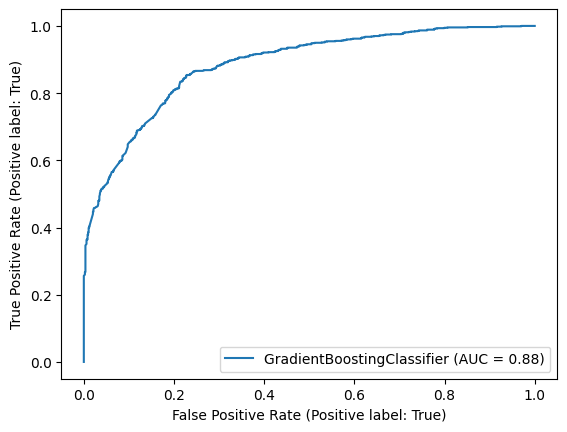

In [ ]:
# import ROCcurvedisplay
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(gbc, x_test, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, gby_preds))

[[651 191]
 [135 762]]


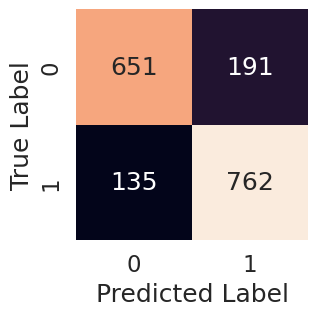

In [ ]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
  """
  Plots a nice looking confusiont matrix using seaborn's heatmap()
  """
  fig,ax = plt.subplots(figsize=(3,3))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot=True,
                   cbar=False,
                   fmt='g')
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")

plot_conf_mat(y_test, gby_preds)

In [ ]:
feature_imp = pd.DataFrame({"Columns": x_train.columns,
                            "Importances": gbc.feature_importances_})

feature_imp

,Columns,Importances
0,HomePlanet,0.080422
1,CryoSleep,0.403035
2,Destination,0.008266
3,Age,0.058368
4,VIP,0.002144
5,RoomService,0.074592
6,FoodCourt,0.104331
7,ShoppingMall,0.052492
8,Spa,0.098587
9,VRDeck,0.104413


In [ ]:
def cryo_prediction(df_temp):
  df_temp = convert_to_categorical(df_temp)
  cryo_test = cryo_df[cryo_df.CryoSleep.isna()]

  cx = clean_cryo_df.drop("CryoSleep",axis = 1)
  cy = clean_cryo_df.CryoSleep
  clean_cryo_test = handles_missing_values(cryo_test)
  clean_cryo_test.drop("CryoSleep",axis=1, inplace=True)

  clean_cryo_test["CryoSleep"] = cs_rfc.predict(clean_cryo_test)

  final_cryo_train = cryo_missing(clean_cryo_df, False)
  final_cryo_test = cryo_missing(clean_cryo_test, True)
  frames = [final_cryo_train, final_cryo_test]
  final_df = pd.concat(frames)

In [ ]:
test_df = pd.read_csv("test.csv")

In [ ]:
def handles_missing_columns(df):
  missing_columns = list(set(cx_train) - set(df))

  if missing_columns:
    for columns in missing_columns:
      df[columns] = False

  df = df[cx_train.columns]

  return df

In [ ]:
test_df = convert_to_categorical(test_df)
# test_df = handles_missing_values
cryo_to_pred = test_df[test_df.CryoSleep.isna()]
cryo_to_pred.drop("CryoSleep", axis=1, inplace=True)

<ipython-input-379-5151e283548c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cryo_to_pred.drop("CryoSleep", axis=1, inplace=True)


In [ ]:
cryo_to_pred = handles_missing_values(cryo_to_pred)
cryo_to_pred = handles_missing_columns(cryo_to_pred)

<ipython-input-291-22af8e3f03bd>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[column+ "_is_missing"] = pd.isnull(values)
<ipython-input-291-22af8e3f03bd>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[column].fillna(np.nanmedian(values), inplace=True)
<ipython-input-291-22af8e3f03bd>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [ ]:
cryo_to_pred.head().T

,68,78,92,99,165
PassengerId,69,79,93,100,166
HomePlanet,3,1,1,1,2
Cabin,1813,2760,2808,0,23
Destination,3,1,3,3,3
Age,27.0,8.0,40.0,22.0,33.0
VIP,1,1,1,1,1
RoomService,0.0,0.0,44.0,0.0,0.0
FoodCourt,0.0,0.0,0.0,0.0,1030.0
ShoppingMall,0.0,0.0,565.0,0.0,0.0
Spa,0.0,0.0,0.0,0.0,3490.0


In [ ]:
cryo_to_pred["CryoSleep"] = cs_rfc.predict(cryo_to_pred)

In [ ]:
cryo_to_pred

,PassengerId,HomePlanet,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing,PassengerId_is_missing,HomePlanet_is_missing,Cabin_is_missing,Destination_is_missing,VIP_is_missing,Name_is_missing,CryoSleep
68,69,3,1813,3,27.0,1,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,2
78,79,1,2760,1,8.0,1,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,1
92,93,1,2808,3,40.0,1,44.0,0.0,565.0,0.0,...,False,False,False,False,False,False,False,False,False,1
99,100,1,0,3,22.0,1,0.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,2
165,166,2,23,3,33.0,1,0.0,1030.0,0.0,3490.0,...,False,False,False,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,3,1652,1,20.0,1,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,2
4108,4109,2,389,3,27.0,1,0.0,2182.0,7.0,2582.0,...,False,False,False,False,False,False,False,False,False,1
4209,4210,2,0,3,41.0,1,0.0,1998.0,0.0,1023.0,...,False,False,False,False,False,True,False,False,False,1
4230,4231,1,1644,3,14.0,1,0.0,0.0,0.0,1377.0,...,True,False,False,False,False,False,False,False,False,1


In [ ]:
cryo_non_pred = test_df.dropna(subset=["CryoSleep"])
cryo_non_pred = handles_missing_values(cryo_non_pred)
# cryo_non_pred = handles_missing_columns(cryo_non_pred)

In [ ]:
final_non_pred = cryo_missing(cryo_non_pred, False)
final_pred = cryo_missing(cryo_to_pred, True)
frames = [cryo_non_pred, final_pred]
final_test = pd.concat(frames)

<ipython-input-318-18c1aad4a83a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cryo_data["CryoSleep"+"_is_missing"] = value


In [ ]:
final_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing,PassengerId_is_missing,HomePlanet_is_missing,Cabin_is_missing,Destination_is_missing,VIP_is_missing,Name_is_missing,CryoSleep_is_missing
0,1,1,2,2785,3,27.0,1,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,1868,3,19.0,1,0.0,9.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,3,2,2,258,1,31.0,1,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,4,2,1,260,3,38.0,1,0.0,6652.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,5,1,1,1941,3,20.0,1,10.0,0.0,635.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,3,2,1652,1,20.0,1,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
4108,4109,2,1,389,3,27.0,1,0.0,2182.0,7.0,...,False,False,False,False,False,False,False,False,False,True
4209,4210,2,1,0,3,41.0,1,0.0,1998.0,0.0,...,False,False,False,False,False,True,False,False,False,True
4230,4231,1,1,1644,3,14.0,1,0.0,0.0,0.0,...,True,False,False,False,False,False,False,False,False,True


In [ ]:
final_test.sort_values("PassengerId", ascending=True,inplace=True)

In [ ]:
final_test.isna().sum()

PassengerId                0
HomePlanet                 0
CryoSleep                  0
Cabin                      0
Destination                0
Age                        0
VIP                        0
RoomService                0
FoodCourt                  0
ShoppingMall               0
Spa                        0
VRDeck                     0
Name                       0
Age_is_missing             0
RoomService_is_missing     0
FoodCourt_is_missing       0
ShoppingMall_is_missing    0
Spa_is_missing             0
VRDeck_is_missing          0
PassengerId_is_missing     0
HomePlanet_is_missing      0
Cabin_is_missing           0
Destination_is_missing     0
VIP_is_missing             0
Name_is_missing            0
CryoSleep_is_missing       0
dtype: int64

In [ ]:
def cryo_prediction(df):
  test_df = df.copy()
  test_df = convert_to_categorical(test_df)
  cryo_to_pred = test_df[test_df.CryoSleep.isna()]
  cryo_to_pred.drop("CryoSleep", axis=1, inplace=True)
  cryo_to_pred = handles_missing_values(cryo_to_pred)
  cryo_to_pred = handles_missing_columns(cryo_to_pred)
  cryo_to_pred["CryoSleep"] = cs_rfc.predict(cryo_to_pred)
  cryo_non_pred = test_df.dropna(subset=["CryoSleep"])
  cryo_non_pred = handles_missing_values(cryo_non_pred)
  final_non_pred = cryo_missing(cryo_non_pred, False)
  final_pred = cryo_missing(cryo_to_pred, True)
  frames = [cryo_non_pred, final_pred]
  final_test = pd.concat(frames)
  final_test.sort_values("PassengerId", ascending=True,inplace=True)
  final_test = final_test[final_df.columns]
  # final_test.drop("CryoSleep_is_missing", inplace=True)

  return final_test


In [ ]:
test_trail = pd.read_csv("test.csv")

test_t = cryo_prediction(test_trail)

In [ ]:
cols_to_drop_train = ["PassengerId", "Cabin","Name","PassengerId_is_missing","Cabin_is_missing", "Name_is_missing"]
test_t = test_t.drop(cols_to_drop_train, axis=1)

In [ ]:
final_test = test_t.drop("CryoSleep_is_missing", axis=1)

In [ ]:
prediction = gbc.predict(final_test)

In [ ]:
pred_test = pd.read_csv("test.csv")
pred_test = convert_to_categorical(pred_test)

In [ ]:
pred_test.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale
4276,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley


In [ ]:
pred_test = pred_test.sort_values("PassengerId", ascending=True)

In [ ]:
submission = pd.DataFrame()
submission["PassengerId"] = pred_test.PassengerId
submission["Transported"] = prediction

submission.to_csv("submission.csv", index=False)

In [ ]:
df_final_preds = submission.set_index(["PassengerId", "Transported"])

In [ ]:
df_final_preds

,
PassengerId,Transported
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True
...,...
9266_02,True
9269_01,False
9271_01,True


In [ ]:
df_final_preds.to_csv("Spaceship_submission3.csv")